## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Reading the raw data from spreadsheet

In [2]:
data_raw=pd.read_csv('kaggle_survey_2020_responses.csv')

## Raw Data after importing

In [3]:
data_raw.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating DataFrame and Selection of columns/rows using Loc

In [36]:
df=data_raw.iloc[1:,]
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization using different kinds of Charts

## Q1. Age distribution of People who filled the surveys

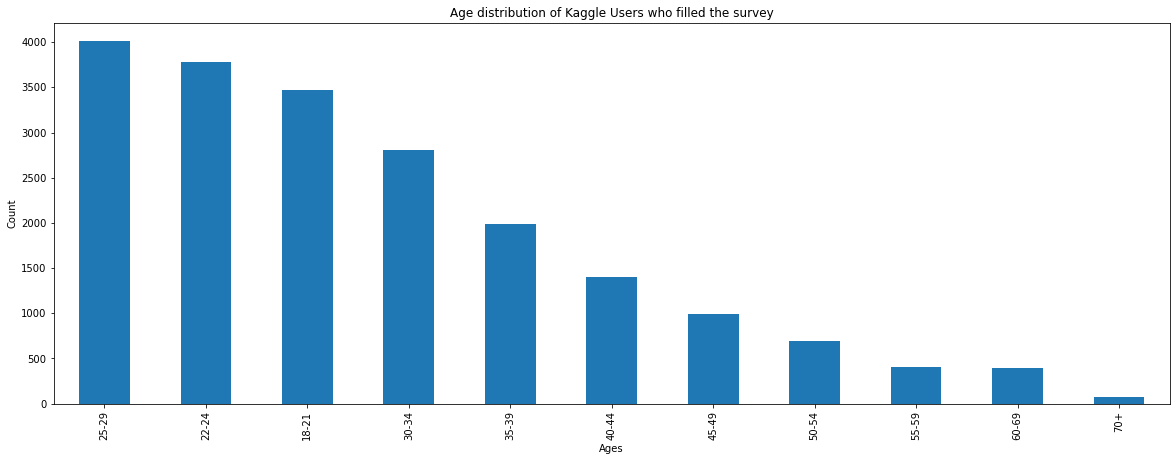

In [5]:
plt.figure(figsize=(20,7))
df['Q1'].value_counts().plot.bar()
plt.title("Age distribution of Kaggle Users who filled the survey")
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

## Q2. Age Distribution based on Data Analyst as Profession

In [8]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') 
fig_data = data_raw.loc[filt, ['Q1','Q5']]

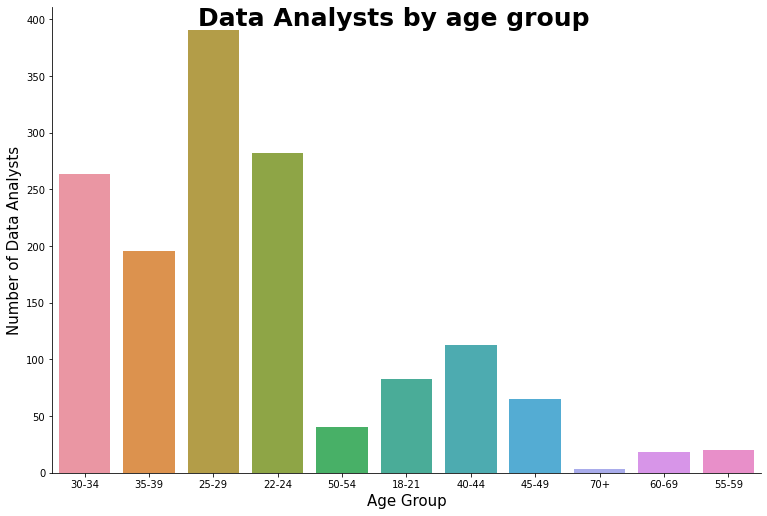

In [14]:
fig = sns.catplot(kind = 'count',
                  data = fig_data,
                  x = 'Q1',
                  height = 7,
                  aspect = 1.5)

fig.set_xlabels('Age Group', size = 15)
fig.set_ylabels('Number of Data Analysts', size = 15)
fig.fig.suptitle("Data Analysts by age group", fontweight = 'bold', size = 25)

plt.show()

## Q3. Distribution of Data Analyst based on Genders

In [15]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst')
fig_data = data_raw.loc[filt, ['Q2','Q5']]

In [23]:
labels = ['Man', 'Woman', 'Prefer not to say', 'Prefer to self-describe', 'Nonbinary']
gender = px.pie(names = labels,
             template = 'ggplot2')

gender.update_layout(title = {'text':'Data Analysts by Genders', 'font': {'size': 24, 'color': 'RoyalBlue'}},
                  width = 900)
gender.show()

## Q4. Language recommended by Data Analyst based on years of experience in coding

In [24]:
filt = ((data_raw.loc[: ,'Q5'] == 'Data Analyst') &
        (data_raw.loc[: ,'Q6'].isin(['< 1 years','5-10 years', '10-20 years'])) &
        (data_raw.loc[:,'Q8'] != 'Other') &
        (data_raw.loc[:,'Q8'] != 'None'))

fig_data = data_raw.loc[filt, ['Q8','Q6','Q5']]

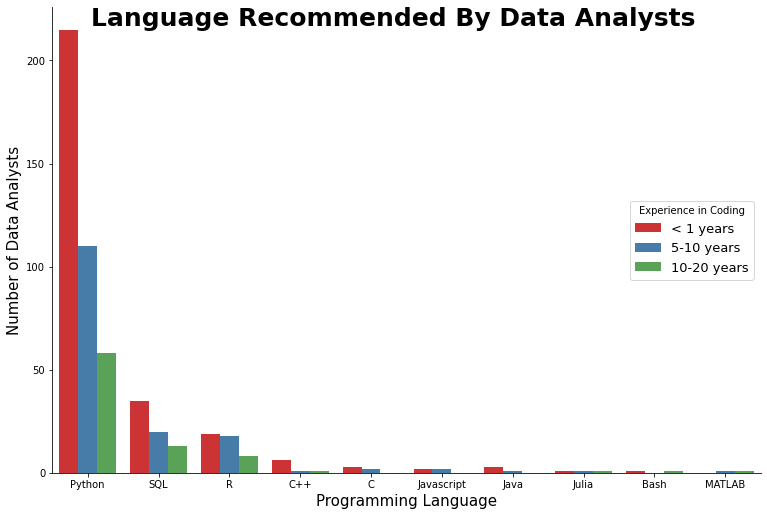

In [26]:
order = fig_data.loc[:, 'Q8'].value_counts().index.tolist()

fig = sns.catplot(kind = 'count',
                  data = fig_data,
                  hue = 'Q6',
                  x = 'Q8',
                  height = 7,
                  aspect = 1.5,
                  order = order,
                  palette = sns.color_palette('Set1'),
                  legend_out = False)

fig.set_xlabels('Programming Language', size = 15)
fig.set_ylabels('Number of Data Analysts', size = 15)
fig.fig.suptitle("Language Recommended By Data Analysts", fontweight = 'bold', size = 25)

fig.add_legend(title='Experience in Coding', fontsize = 13, loc = 'center right')

plt.show()


##  Q5. Recommended/Commonly Used Big Data products  by Data Analyst

In [29]:
## filtering for "data analysts" and selecting columns
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[:,'Q30'] != 'Other')
fig_data = data_raw.loc[filt, ['Q30','Q5']]

fig_data.Q30.value_counts();

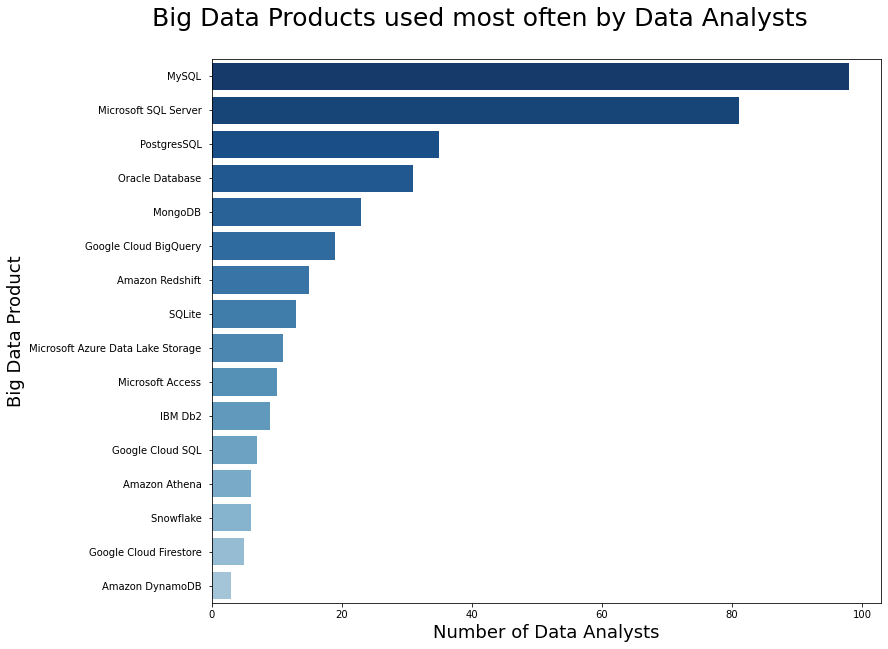

In [30]:
order = fig_data.loc[:, 'Q30'].value_counts().index.tolist()

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              y = 'Q30', 
              order = order,
              ax = ax,
              palette = sns.color_palette('Blues_r', 25))

ax.set_title('Big Data Products used most often by Data Analysts',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Big Data Product', fontsize = 18)
ax.set_xlabel('Number of Data Analysts', fontsize = 18)

plt.show()

## Q6. Recommended/Commonly Used BI/Visualization tool products  by Data Analyst

In [31]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[:,'Q32'] != 'Other')
fig_data = data_raw.loc[filt, ['Q32','Q5']]

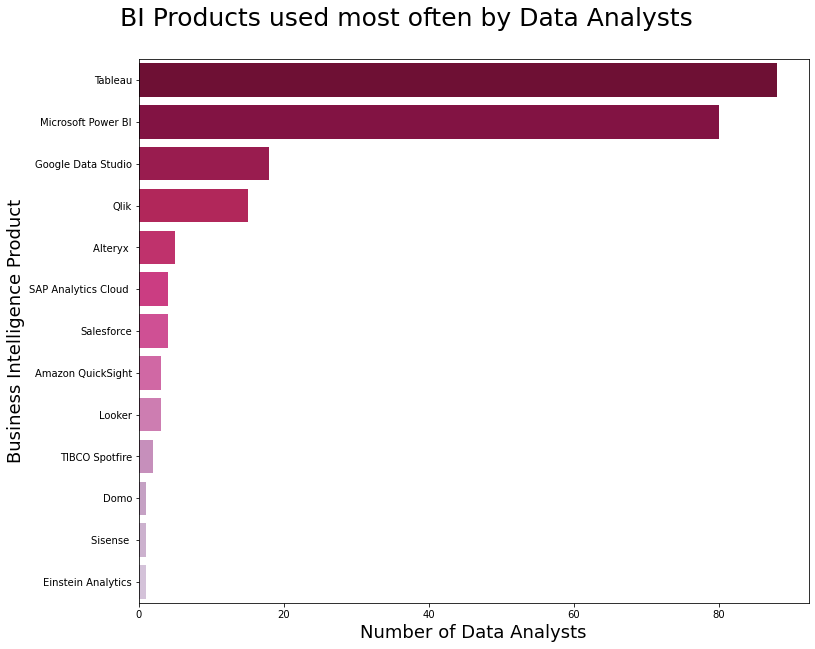

In [32]:
order = fig_data.loc[:, 'Q32'].value_counts().index.tolist()

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              y = 'Q32', 
              order = order,
              ax = ax,
              palette = sns.color_palette('PuRd_r', 16))

ax.set_title('BI Products used most often by Data Analysts',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Business Intelligence Product', fontsize = 18)
ax.set_xlabel('Number of Data Analysts', fontsize = 18)

plt.show()


## Q7. Recommended/Commonly Used Data Analysing tool  by Data Analyst

In [34]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[:,'Q38'] != 'Other')
fig_data = data_raw.loc[filt, ['Q38','Q5']]

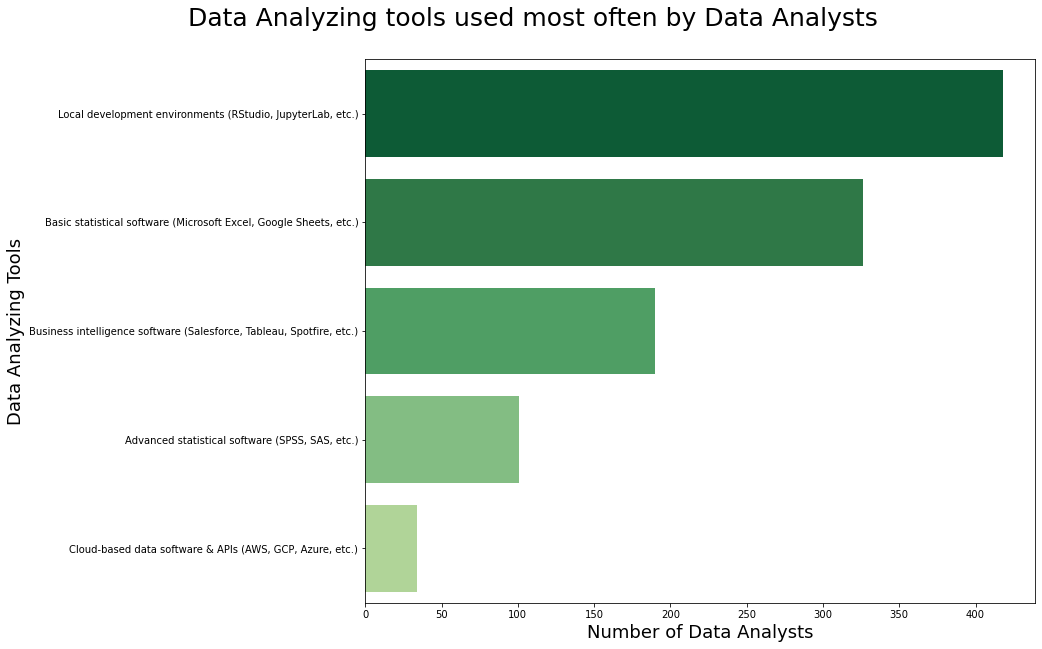

In [35]:
order = fig_data.loc[:, 'Q38'].value_counts().index.tolist()

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              y = 'Q38', 
              order = order,
              ax = ax,
              palette = sns.color_palette('YlGn_r', 7))

ax.set_title('Data Analyzing tools used most often by Data Analysts',
             fontsize = '25',
             x = 0.25,
             y = 1.05)

ax.set_ylabel('Data Analyzing Tools', fontsize = 18)
ax.set_xlabel('Number of Data Analysts', fontsize = 18)

plt.show()

## Q8. Data Analyst and their size of Company

In [50]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') 
fig_data = data_raw.loc[filt, ['Q20','Q5']]

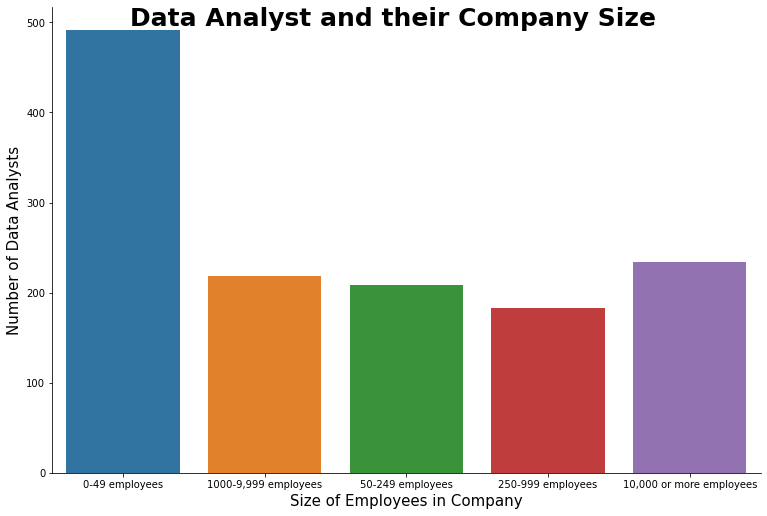

In [54]:
fig = sns.catplot(kind = 'count',
                  data = fig_data,
                  x = 'Q20',
                  height = 7,
                  aspect = 1.5)

fig.set_xlabels('Size of Employees in Company', size = 15)
fig.set_ylabels('Number of Data Analysts', size = 15)
fig.fig.suptitle("Data Analyst and their Company Size", fontweight = 'bold', size = 25)

plt.show()

## Q9. Distribution of Data Analyst using ML Methods  regularly

In [98]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[:,'Q15'] != 'I do not use machine learning methods')
fig_data = data_raw.loc[filt, ['Q15','Q5']]

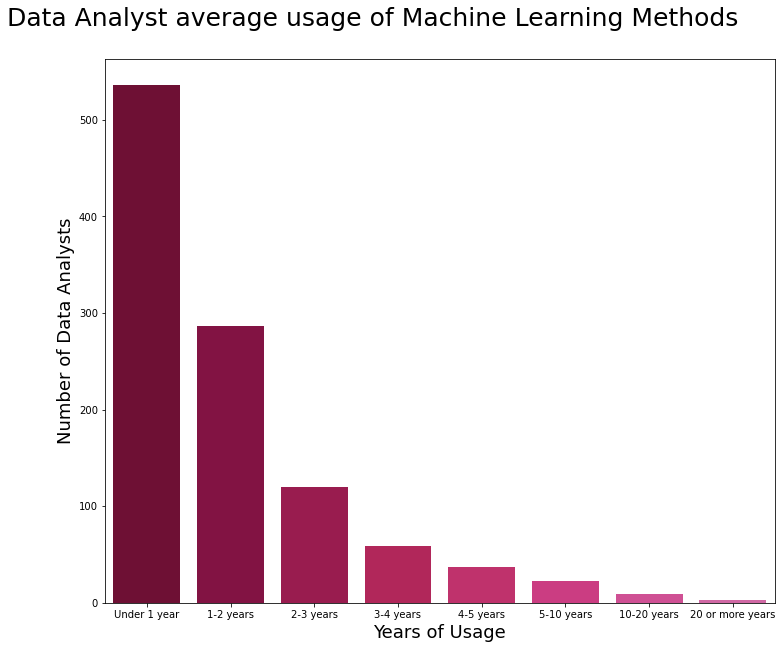

In [99]:
order = fig_data.loc[:, 'Q15'].value_counts().index.tolist()

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              x = 'Q15', 
              order = order,
              ax = ax,
              palette = sns.color_palette('PuRd_r', 16))

ax.set_title('Data Analyst average usage of Machine Learning Methods',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Number of Data Analysts', fontsize = 18)
ax.set_xlabel('Years of Usage', fontsize = 18)

plt.show()

## Q10. Educational Qualification of Data Analyst as Profession

In [125]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[: ,'Q4'] != 'I prefer not to answer')

fig_data = data_raw.loc[filt, ['Q4','Q5']]

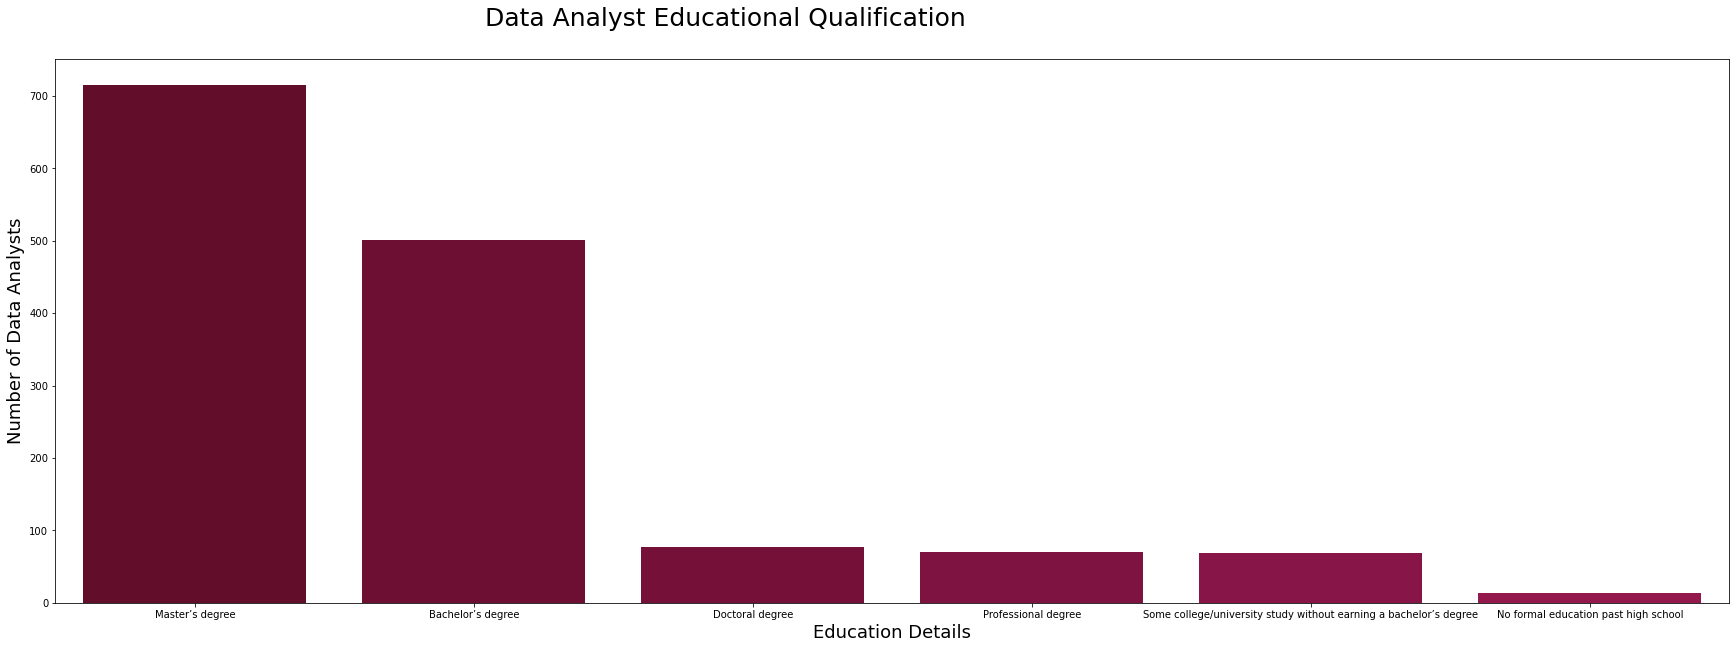

In [126]:
order = fig_data.loc[:,'Q4'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              x = 'Q4', 
              order = order,
              ax = ax,
              palette = sns.color_palette('PuRd_r', 36))

ax.set_title('Data Analyst Educational Qualification',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Number of Data Analysts', fontsize = 18)
ax.set_xlabel('Education Details', fontsize = 18)

plt.show()

## Q11. Highest Number Data Analyst Country of Residence

In [127]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst')

fig_data = data_raw.loc[filt, ['Q3','Q5']]

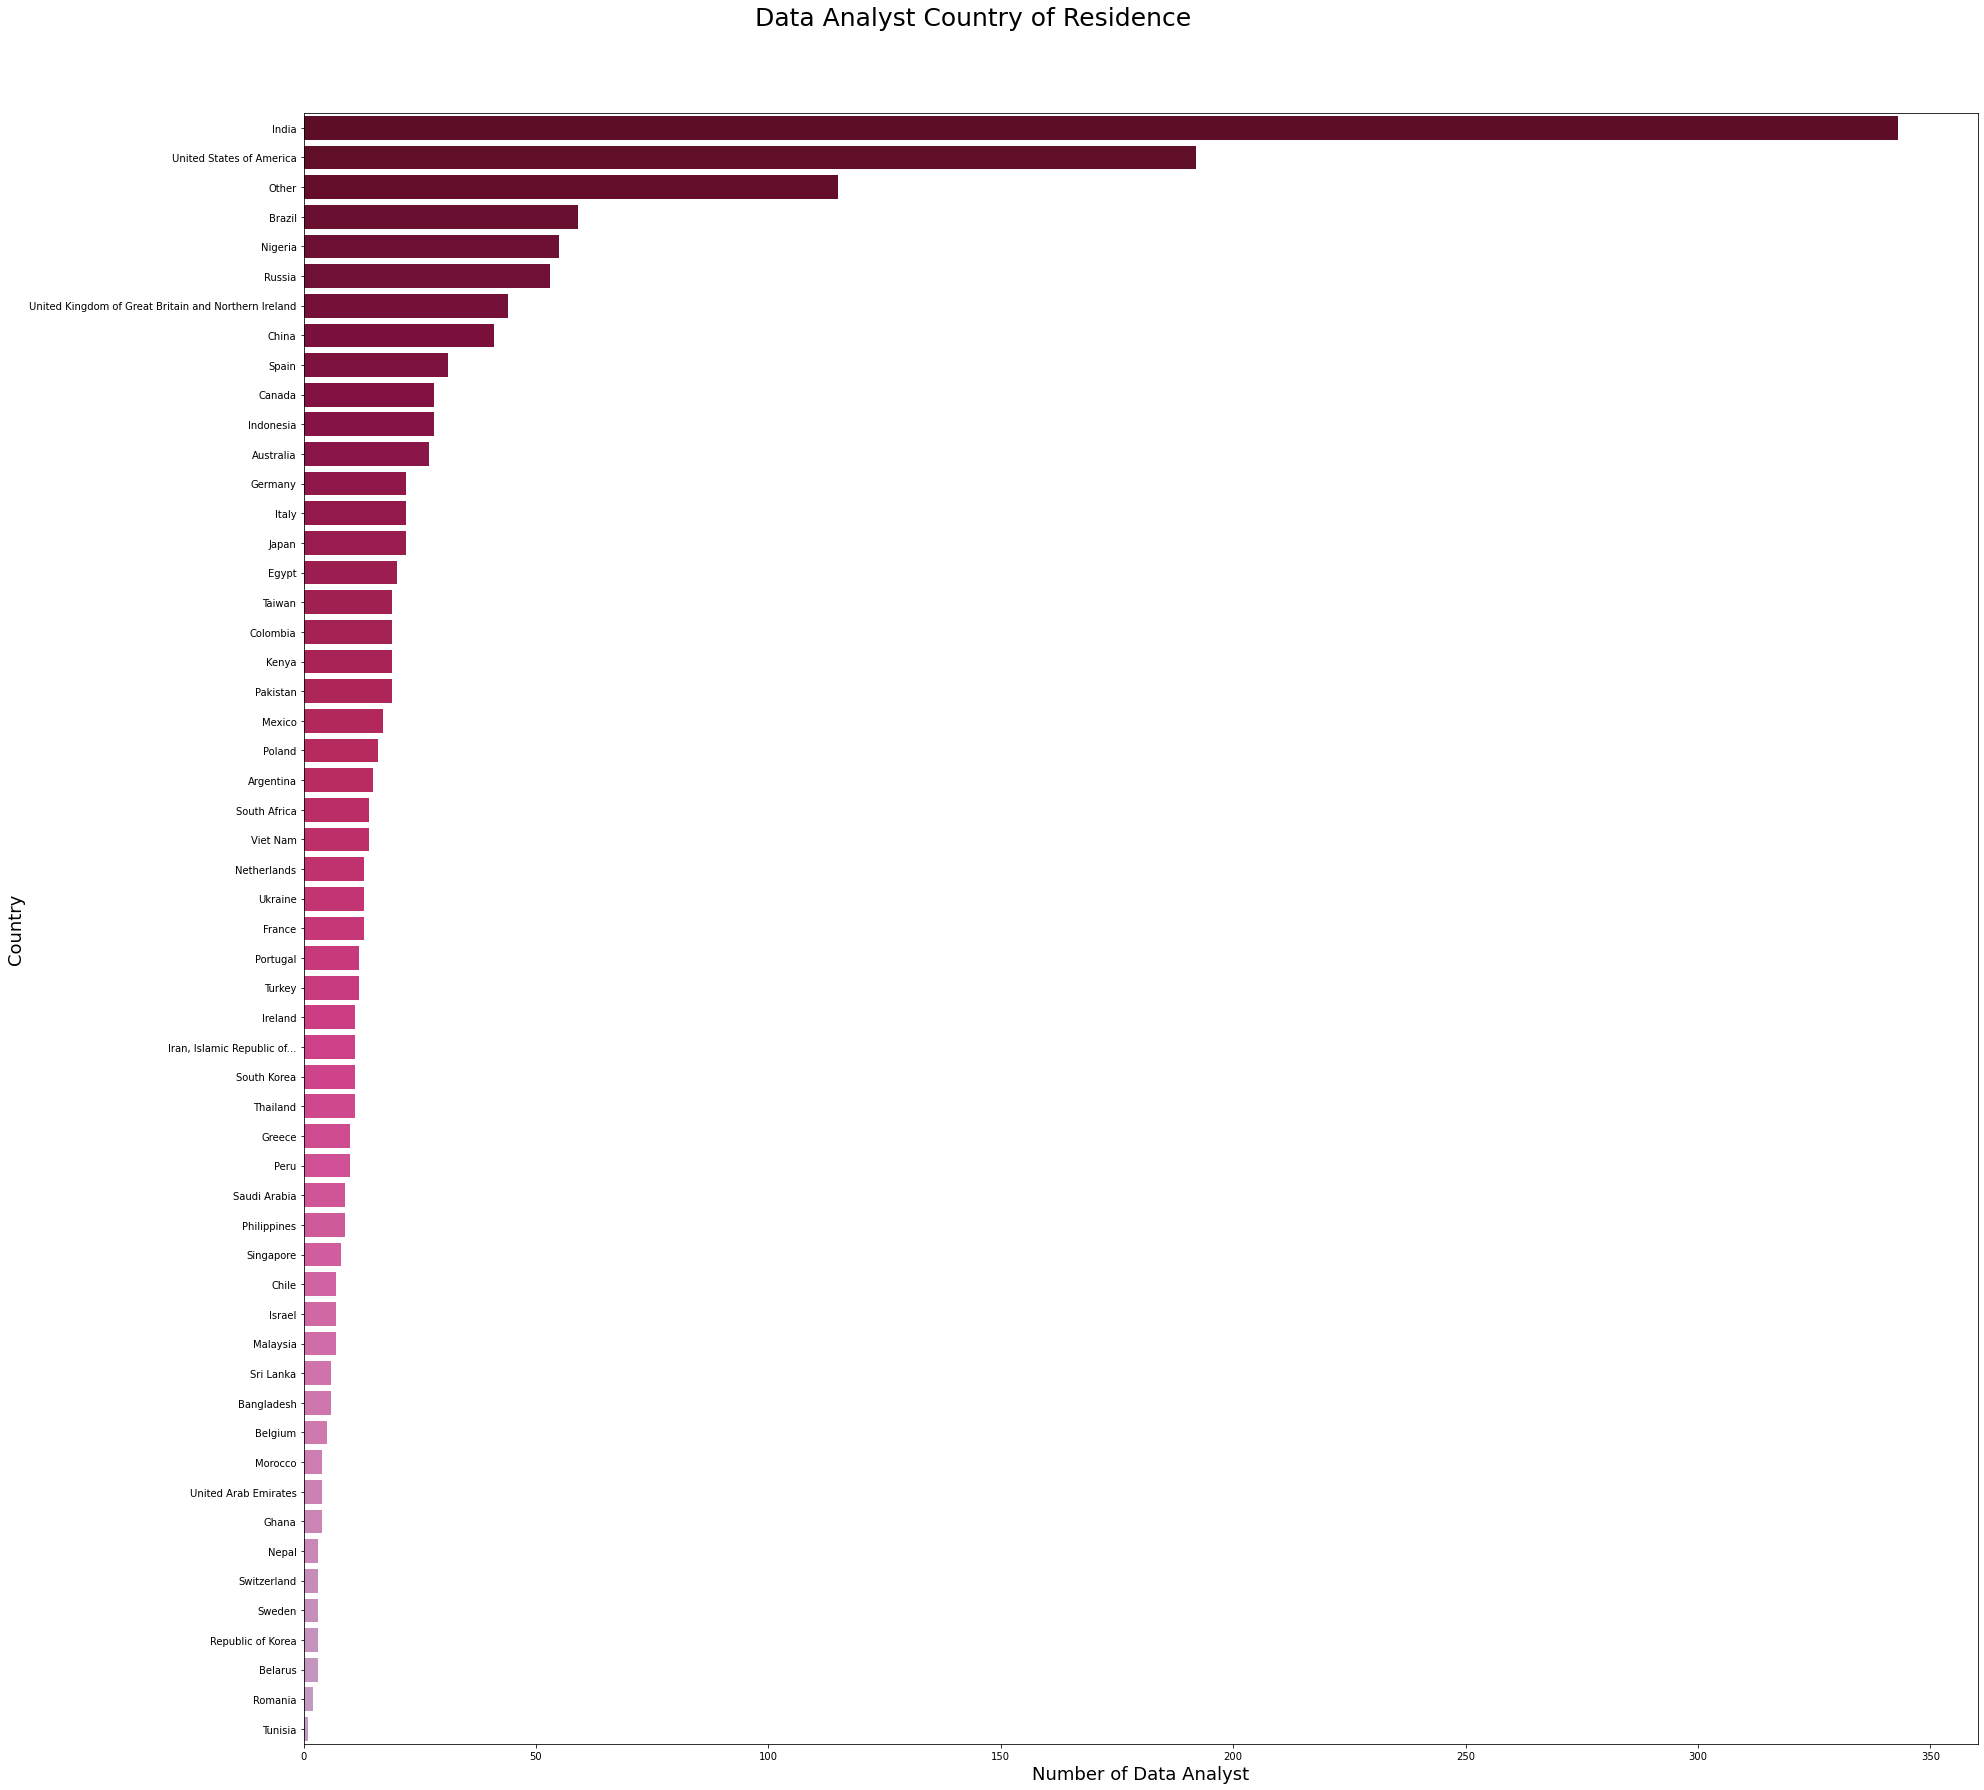

In [133]:
order = fig_data.loc[:,'Q3'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 30))
ax = fig.subplots()
sns.countplot(data = fig_data,
              y = 'Q3', 
              order = order,
              ax = ax,
              palette = sns.color_palette('PuRd_r', 86))

ax.set_title('Data Analyst Country of Residence',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Country', fontsize = 18)
ax.set_xlabel('Number of Data Analyst', fontsize = 18)

plt.show()

## Q12. Data Analyst spent money on Cloud Computing

In [134]:
filt = (data_raw.loc[: ,'Q5'] == 'Data Analyst') & (data_raw.loc[: ,'Q25'] != '$0 ($USD)')

fig_data = data_raw.loc[filt, ['Q25','Q5']]

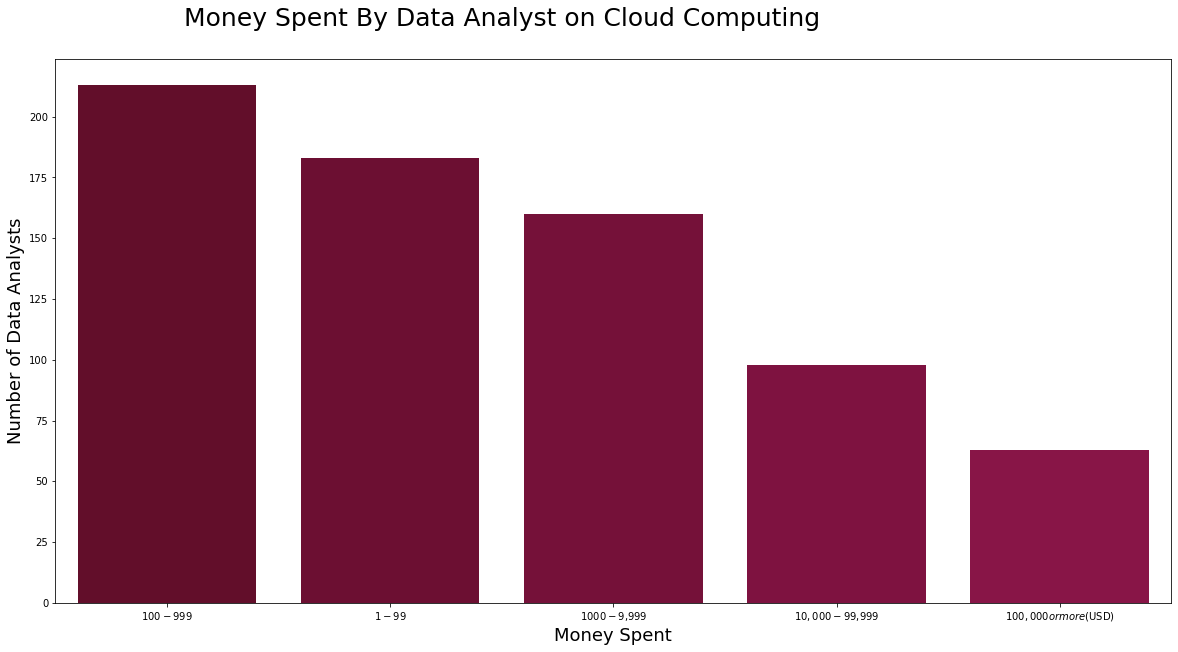

In [137]:
order = fig_data.loc[:,'Q25'].value_counts().index.tolist()

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots()
sns.countplot(data = fig_data,
              x = 'Q25', 
              order = order,
              ax = ax,
              palette = sns.color_palette('PuRd_r', 36))

ax.set_title('Money Spent By Data Analyst on Cloud Computing',
             fontsize = '25',
             x = 0.4,
             y = 1.05)

ax.set_ylabel('Number of Data Analysts', fontsize = 18)
ax.set_xlabel('Money Spent', fontsize = 18)

plt.show()